<a href="https://colab.research.google.com/github/namuwasae/pytorchtraining/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [18]:
N = 20
random0 = torch.randn(int(N/2),1)
random5 = torch.randn(int(N/2),1)+5
class1_data = torch.cat([random0,random5],dim=1)
class2_data = torch.cat([random5,random0],dim=1)
class1_label = torch.ones(int(N/2),1)
class2_label = torch.zeros(int(N/2),1)
X = torch.cat([class1_data,class2_data],dim=0)
y = torch.cat([class1_label,class2_label],dim=0)

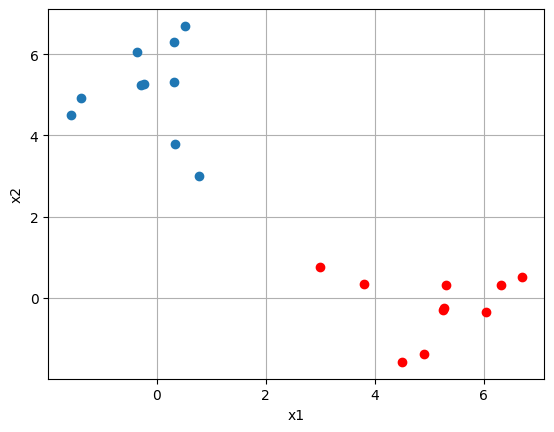

In [19]:
import matplotlib.pyplot as plt
plt.plot(class1_data[:,0],class1_data[:,1], 'o')
plt.plot(class2_data[:,0],class2_data[:,1], 'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

In [20]:
from torch import nn

class MLP(nn.Module):
  def __init__(self):
    super().__init__()

    # case 1, plain
    self.linear = nn.Sequential(nn.Linear(2,100), # 10, 100, 1000, 10000으로 바꿔보면서 확인
                                nn.Sigmoid(),
                                nn.Linear(100,1),
                                nn.Sigmoid())

    # # case 1, very simple
    # self.linear = nn.Sequential(nn.Linear(2,1), # 아주 simple한 것
    #                             nn.Sigmoid())

    # # case 1, deep
    # self.linear = nn.Sequential(nn.Linear(2,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn,Linear(100,1),
    #                             nn.Sigmoid())

    # # case 2, plain
    # self.linear = nn.Sequential(nn.Sequential(2,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,1),
    #                             nn.Sigmoid())

    # # case 2, very simple
    # self.linear = nn.Sequential(nn.Linear(2,1), # 선형 분류만 가능해서 불가
    #                             nn.Sigmoid())

    # # case 2, deep
    # self.linear = nn.Sequential(nn.Linear(2,100), # LR을 줄이니까 수렴
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,100),
    #                             nn.Sigmoid(),
    #                             nn.Linear(100,1),
    #                             nn.Sigmoid())
    # # case2, very deep
    # self.linear = nn.Sequential(nn.Linear(2,100),
    #                             nn.Sigmoid(),
    #                             *[i for _ in range(10) for i in [nn.Linear(100, 100)]]
    #                             )

  def forward(self, x):
    x = self.linear(x)
    return x


In [21]:
model = MLP()
print(model)
print(model(torch.randn(5,2)).shape) # 2개의 값으로 이루어진 좌표값 (x1, x2) 데이터 5개를 입력함
print(model(torch.randn(5,2))) # 분류라서 0.5에 가까우면 안좋은 상황. 학습 아직 안시켰으니 괜찮.

MLP(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
torch.Size([5, 1])
tensor([[0.5905],
        [0.5957],
        [0.5941],
        [0.5914],
        [0.5809]], grad_fn=<SigmoidBackward0>)


# 3. 모델 학습시키기

In [22]:
from torch import optim
# !pip install torchviz
# from torchviz import make_dot

LR = 1e-4

EPOCH = 100

optimizer = optim.SGD(model.parameters(), lr = LR)
# optimizer = optim.Adam(model.parameters(), lr = LR)
# optimizer = optim.Adam(model.parameters(), lr = LR, eps = 0, betas = (0.9, 0.99))

criterion = nn.BCELoss()

loss_history = []
grad_history = []
update_size_history = []

model.train() # train mode로 전환

for ep in range(EPOCH): # 예 로 미 업 : 예측,로스,미분,업데이트

  # inference
  y_hat = model(X)
  # loss
  loss = criterion(y_hat,y)
  # prev weights
  # prev = model.linear[0].weight.detach().clone()
  # update
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # update amount
  # grad_history += [torch.sum(torch.abs(model.linear[0].weight.grad)).item()]
  # update_size_history += [torch.sum(torch.abs(model.linear[0].weight.detach()-prev)).item()]
  loss_history+=[loss.item()]
  print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
  print("-"*20)



Epoch: 1, train loss: 0.7164
--------------------
Epoch: 2, train loss: 0.7162
--------------------
Epoch: 3, train loss: 0.7161
--------------------
Epoch: 4, train loss: 0.7159
--------------------
Epoch: 5, train loss: 0.7158
--------------------
Epoch: 6, train loss: 0.7156
--------------------
Epoch: 7, train loss: 0.7155
--------------------
Epoch: 8, train loss: 0.7153
--------------------
Epoch: 9, train loss: 0.7152
--------------------
Epoch: 10, train loss: 0.7150
--------------------
Epoch: 11, train loss: 0.7149
--------------------
Epoch: 12, train loss: 0.7147
--------------------
Epoch: 13, train loss: 0.7146
--------------------
Epoch: 14, train loss: 0.7144
--------------------
Epoch: 15, train loss: 0.7143
--------------------
Epoch: 16, train loss: 0.7141
--------------------
Epoch: 17, train loss: 0.7140
--------------------
Epoch: 18, train loss: 0.7138
--------------------
Epoch: 19, train loss: 0.7137
--------------------
Epoch: 20, train loss: 0.7135
----------

In [23]:
# 수식 손수 짜기 (Binary Cross Entropy)
print(criterion(y_hat,y))
print(torch.sum(-torch.log(y_hat**y*(1-y_hat)**(1-y)))/N)
print(criterion(torch.tensor([0.]),torch.tensor([1.])))

tensor(0.7017, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.7017, grad_fn=<DivBackward0>)
tensor(100.)


# 4. 모델 테스트

Text(0.5, 0.5, 'x2')

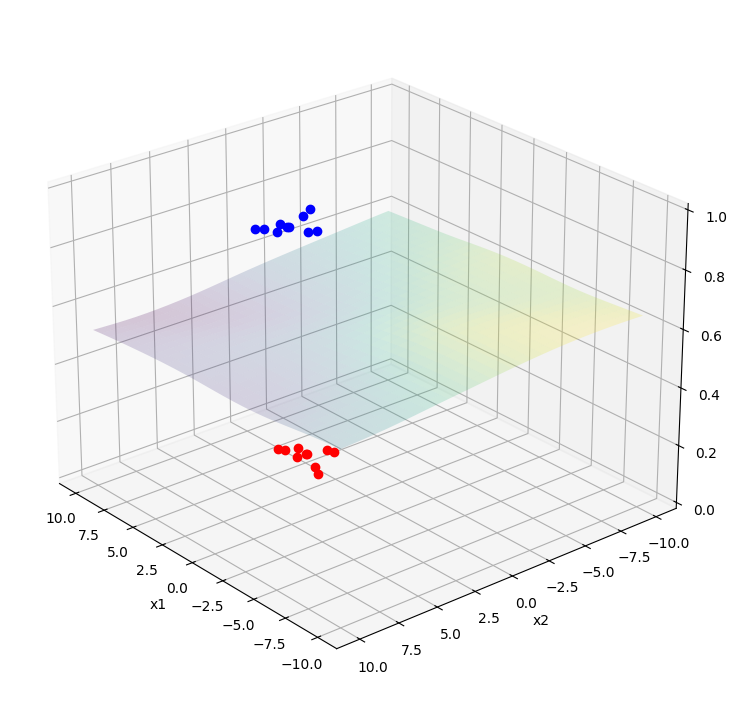

In [28]:
# meshgrid로 좌푯값을 잡으 다음 예측값들을 찍고, 3D로 확인해볼 것임
x1_test = torch.linspace(-10,10,30) # case 1
x2_test = torch.linspace(-10,10,30) # case 1
# x1_test = torch.linspace(-2,2,30) # case 2
# x2_test = torch.linspace(-2,2,30) # case 2

X1_test, X2_test=torch.meshgrid(x1_test,x2_test)
X_test = torch.cat([X1_test.unsqueeze(dim=2), X2_test.unsqueeze(dim=2)], dim=2)

# 1. 해결 (Dropout 혹은 BN(배치놈) 같은걸 사용했다면 train mode와 test mode의 동작이 다르므로 eval()로 모드를 바꿔줘야한다)
model.eval() # test model로
with torch.no_grad(): # 2. 해결
  y_hat = model(X_test) # test할때는 grad_fn 계산을 안해도 되니까, 메모리가 불필요하게 쓰이지 않도록 no_grad해준다.

Y_hat = y_hat.squeeze()


plt.figure(figsize = [10,9])
ax = plt.axes(projection="3d")
ax.view_init(elev=25,azim=140)


ax.plot_surface(X1_test,X2_test,Y_hat.numpy(),cmap="viridis", alpha=0.2)
plt.plot(class1_data[:,0],class1_data[:,1],class1_label.squeeze(),'bo')
plt.plot(class2_data[:,0],class2_data[:,1],class2_label.squeeze(),'ro')
plt.xlabel("x1")
plt.ylabel("x2")